In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-fitting-pirate)

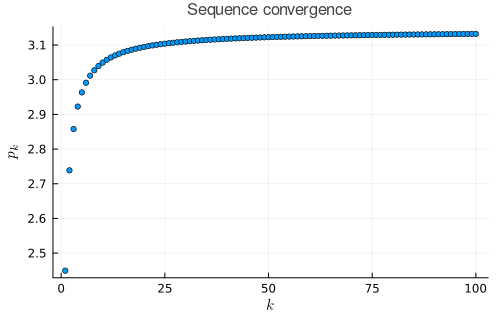

In [2]:
a = [1/k^2 for k=1:100] 
s = cumsum(a)        # cumulative summation
p = @. sqrt(6*s)

scatter(1:100, p;
    title="Sequence convergence",
    xlabel=L"k",  ylabel=L"p_k")

This graph suggests that maybe $p_k\to \pi$, but it's far from clear how close the sequence gets. It's more informative to plot the sequence of errors, $\epsilon_k= |\pi-p_k|$. By plotting the error sequence on a log-log scale, we can see a nearly linear relationship.

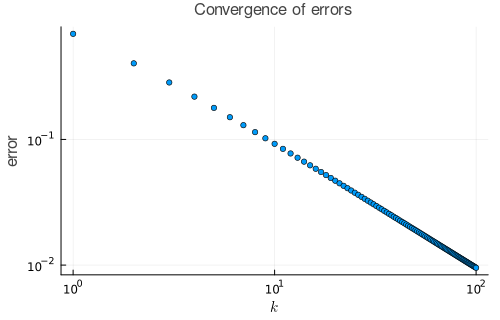

In [3]:
ϵ = @. abs(π - p)    # error sequence
scatter(1:100, ϵ;
    title="Convergence of errors",
    xaxis=(:log10,L"k"),  yaxis=(:log10,"error"))

The straight line on the log-log scale suggests a power-law relationship where $\epsilon_k\approx a k^b$, or $\log \epsilon_k \approx b (\log k) + \log a$.

In [4]:
k = 1:100
V = [ k.^0 log.(k) ]     # fitting matrix
c = V \ log.(ϵ)          # coefficients of linear fit

2-element Vector{Float64}:
 -0.18237524972829994
 -0.9674103233127929

In terms of the parameters $a$ and $b$ used above, we have

In [5]:
a, b = exp(c[1]), c[2];
@show b;

b = -0.9674103233127929

It's tempting to conjecture that the slope $b\to -1$ asymptotically. Here is how the numerical fit compares to the original convergence curve.

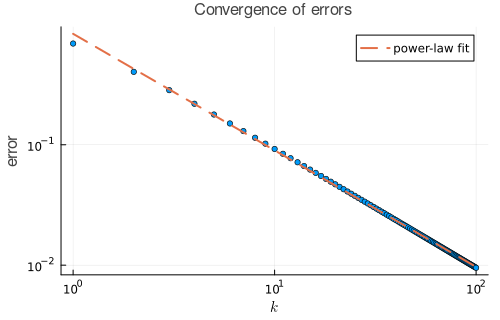

In [6]:
plot!(k, a * k.^b, l=:dash, label="power-law fit")